In [1]:
import pandas as pd
import sklearn
import re
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer as porterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords

C:\Users\shekh\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
stopwords_set = set(stopwords.words('english'));

In [3]:
def cleanText(inputText):
    tempText = inputText;
    tempText = re.sub('<[^<]+?>', ' ', tempText);
    tempText = re.sub(r'&amp[;]?', r' ', tempText);
    tempText = re.sub(r'\'s', ' ', tempText);
    tempText = re.sub(r'[\w\.-]+@[\w\.-]+', ' ', tempText);
    tempText = re.sub(r'[<>!#\[\]@/$:.,;%\()*?-]+', r' ', tempText);
    tempText = re.sub(r'\s+', r' ', tempText);
    words_filtered =[word.lower() for word in tempText.split()]
    cleanWordsList = [word for word in words_filtered if word not in stopwords_set]      #remove stopwords except few exceptions  
    cleanfeature = ' '.join(cleanWordsList)
    return cleanfeature

In [4]:
df = pd.read_json('C:/Users/shekh/Desktop/rentallisting/train.json')

In [5]:
df['display_address'] = df['display_address'].astype('category')
df['display_address_codes'] = df['display_address'].cat.codes

df['latitude'] = df['latitude'].astype('category')
df['latitude_codes'] = df['latitude'].cat.codes

df['longitude'] = df['longitude'].astype('category')
df['longitude_codes'] = df['longitude'].cat.codes

df['manager_id'] = df['manager_id'].astype('category')
df['manager_id_codes'] = df['manager_id'].cat.codes

df['interest_level'] = df['interest_level'].astype('category')
df['interest_level_codes'] = df['interest_level'].cat.codes

In [21]:
# jointFeaturesDescDF = df[['description','features']];
label_column = df['interest_level_codes']
# type(jointFeaturesDescDF)

In [ ]:
# jointFeaturesDescList = []
# for row in jointFeaturesDescDF.iterrows():
#     tempList = row[1];
#     description = tempList['description'];
#     featureStr = ' '.join(tempList['features']);
#     joinedStr = ' '.join([description,";",featureStr]);
#     joinedStr = cleanText(joinedStr).encode('ascii', 'ignore').strip();
#     jointFeaturesDescList.append(joinedStr);

In [ ]:
# print len(jointFeaturesDescList);

In [ ]:
# jointFeaturesDescList[1]

In [22]:
label_column_list = label_column.tolist();

In [ ]:
# # Create feature vectors
# vectorizer = TfidfVectorizer(min_df=0.00125,
#                              max_df = 0.80,
#                              sublinear_tf=True,
#                              use_idf=True,
#                              stop_words=u'english',
#                              analyzer='word',
#                              ngram_range=(1,3),lowercase=True)

In [ ]:
# totalVectors = vectorizer.fit_transform(jointFeaturesDescList);
# print totalVectors.shape

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(totalVectors,label_column_list,test_size=0.25,random_state=15,stratify=label_column_list);

In [ ]:
# print X_train.shape
# print X_test.shape

In [ ]:
# adaBoostClassifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=600,learning_rate=1)

In [ ]:
# adaBoostClassifier.fit(X_train,y_train)

In [ ]:
# # predicted_labels = adaBoostClassifier.predict(X_test)
# predicted_labels = adaBoostClassifier.predict(X_test)
# staged_predictions = [p for p in adaBoostClassifier.staged_predict(X_test)]
# staged_scores = [s for s in adaBoostClassifier.staged_score(X_test,y_test)]

In [ ]:
# print len(staged_scores)
# print staged_scores;

In [ ]:
# for i in range(1,601):
#     if i % 60 == 0:
#         print staged_scores[i];

In [6]:
target_names = ['0', '1', '2']

In [ ]:
# actual_class_labels = y_test;
# predicted_class_labels = predicted_labels.tolist();

In [ ]:
# print(classification_report(actual_class_labels, predicted_class_labels, target_names=target_names))

In [ ]:
# cvScores = cross_val_score(adaBoostClassifier, totalVectors, label_column_list, cv=10, scoring='f1_micro');
# print cvScores;

In [7]:
df.columns

Index([            u'bathrooms',              u'bedrooms',
                 u'building_id',               u'created',
                 u'description',       u'display_address',
                    u'features',        u'interest_level',
                    u'latitude',            u'listing_id',
                   u'longitude',            u'manager_id',
                      u'photos',                 u'price',
              u'street_address', u'display_address_codes',
              u'latitude_codes',       u'longitude_codes',
            u'manager_id_codes',  u'interest_level_codes'],
      dtype='object')

In [8]:
featuresDF = df[['bathrooms','bedrooms','price','longitude_codes','latitude_codes','photos','display_address_codes','manager_id_codes']]

In [9]:
featuresDF.head(1)

,bathrooms,bedrooms,price,longitude_codes,latitude_codes,photos,display_address_codes,manager_id_codes
10,1.5,3,3000,879,867,[https://photos.renthop.com/2/7211212_1ed4542e...,6544,1239


In [10]:
new_features_df = pd.DataFrame();
type(new_features_df)
new_features_df.shape

(0, 0)

In [11]:
for row in featuresDF.iterrows():
    row[1].set_value('no_of_photos',len((row[1])['photos']));
    new_features_df = new_features_df.append(row[1]);

In [16]:
#new_features_df = new_features_df.drop('photos', axis=1)
new_features_df['bathrooms'] = new_features_df['bathrooms'].astype('category')
new_features_df['bedrooms'] = new_features_df['bedrooms'].astype('category')
new_features_df['latitude_codes'] = new_features_df['latitude_codes'].astype('category')
new_features_df['longitude_codes'] = new_features_df['longitude_codes'].astype('category')
new_features_df['manager_id_codes'] = new_features_df['manager_id_codes'].astype('category')
new_features_df['no_of_photos'] = new_features_df['no_of_photos'].astype('category')
new_features_df['price'] = new_features_df['price'].astype('category')

In [17]:
new_features_df.head(1)

,bathrooms,bedrooms,display_address_codes,latitude_codes,longitude_codes,manager_id_codes,no_of_photos,price
10,1.5,3.0,6544.0,867.0,879.0,1239.0,5.0,3000.0


In [23]:
label_df = pd.DataFrame(label_column_list);
new_features_train, new_features_test, new_features_y_train, new_features_y_test = train_test_split(new_features_df,label_df,test_size=0.25,random_state=15,stratify=label_column_list)
print len(new_features_train)
print len(new_features_test)
print len(new_features_y_train)
print len(new_features_y_test)
print new_features_train.shape
print new_features_y_train.shape

37014
12338
37014
12338
(37014, 8)
(37014, 1)


In [25]:
print new_features_train.head(1)

      bathrooms bedrooms  display_address_codes latitude_codes  \
99373       1.0      1.0                 5143.0         1401.0   

      longitude_codes manager_id_codes no_of_photos   price  
99373           760.0           3390.0          4.0  2100.0  


In [26]:
adaBoostClassifier_NumericCols = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=600,learning_rate=1)

In [27]:
adaBoostClassifier_NumericCols.fit(new_features_train,new_features_y_train)

C:\Users\shekh\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1, n_estimators=600, random_state=None)

In [28]:
# predict_lab = adaBoostClassifier_NumericCols.predict(new_features_test)
# predicted_labels = adaBoostClassifier.predict(X_test)
staged_predictions_new_features = adaBoostClassifier_NumericCols.staged_predict(new_features_test)
staged_scores_new_features = [s for s in adaBoostClassifier_NumericCols.staged_score(new_features_test,new_features_y_test)]

In [31]:
print len(staged_scores_new_features)
print staged_scores_new_features;

600
[0.69760090776462957, 0.69751985735127253, 0.69784405900470092, 0.70059977305884258, 0.70108607553898528, 0.70197763008591341, 0.70222078132598476, 0.70230183173934191, 0.70343653752634139, 0.70197763008591341, 0.70432809207326952, 0.70586804992705465, 0.70643540282055439, 0.70538174744691196, 0.70659750364726859, 0.70846166315448211, 0.70911006646133901, 0.70838061274112496, 0.70854271356783916, 0.7089479656346247, 0.7089479656346247, 0.70773220943426807, 0.70748905819419683, 0.70902901604798185, 0.70789431026098237, 0.70716485654076833, 0.70773220943426807, 0.70870481439455346, 0.70789431026098237, 0.70886691522126766, 0.70886691522126766, 0.71000162100826714, 0.71000162100826714, 0.71073107472848107, 0.71065002431512403, 0.71113632679526662, 0.71032582266169553, 0.71024477224833849, 0.70992057059490998, 0.70992057059490998, 0.70935321770141024, 0.70911006646133901, 0.70951531852812444, 0.7092721672880532, 0.70992057059490998, 0.71024477224833849, 0.7087858648079105, 0.7087858648

In [32]:
for i in range(1,601):
    if i % 60 == 0:
        print staged_scores_new_features[i];

0.711460528449
0.713000486302
0.711541578862
0.708299562328
0.704084940833
0.701977630086
0.698978764792
0.693791538337
0.691197925109


IndexError: list index out of range

In [ ]:
new_features_actual_class_labels = new_features_y_test;
new_features_predicted_class_labels = predict_lab.tolist();

In [ ]:
print(classification_report(new_features_actual_class_labels, new_features_predicted_class_labels, target_names=target_names))

In [ ]:
cvScores = cross_val_score(adaBoostClassifier_NumericCols, new_features_df, label_df, cv=10, scoring='f1_micro');
print cvScores;

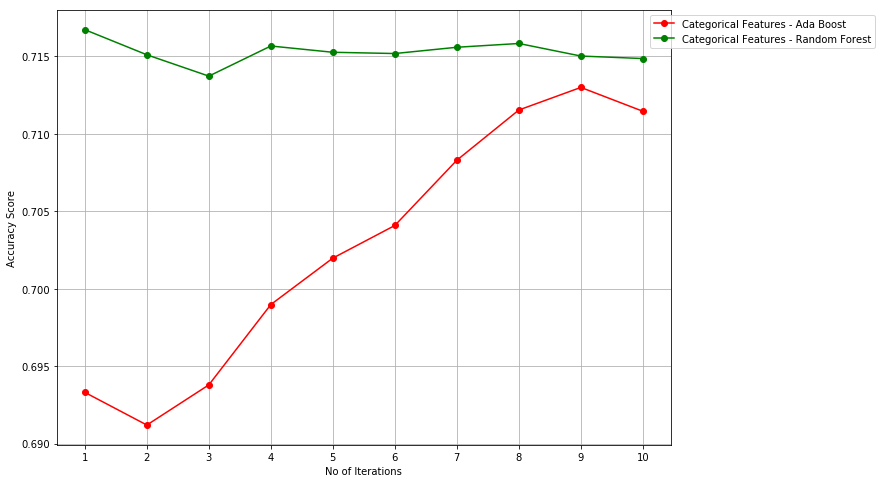

In [37]:
import matplotlib.pyplot as plt
import numpy as np

builds = np.array([1, 2, 3, 4,5,6,7,8,9,10])
y_stack = np.row_stack(([1, 2, 3, 4,5,6,7,8,9,10],[0.693305236,0.691197925,0.693791538,0.698978765,0.70197763,0.704084941,0.708299562,0.711541579,0.713000486,0.711460528],[0.716728805317,0.71510779705,0.713729940023,0.715675149943,0.715269897876,0.715188847463,0.71559409953,0.71583725077,0.715026746636,0.71486464581])) 

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(builds, y_stack[1,:], label='Categorical Features - Ada Boost', color='r', marker='o')
ax1.plot(builds, y_stack[2,:], label='Categorical Features - Random Forest', color='g', marker='o')
# ax1.plot(builds, y_stack[1,:], label='Component 2', color='g', marker='o')

plt.xticks(builds)
plt.xlabel('No of Iterations')
plt.ylabel('Accuracy Score')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.show()